In [ ]:
# ***Practical 1: Perform following tasks: (i) View data collection forms and/or import one mode/ two mode datasets; (ii) Basic Networks matrices transformations***
import networkx as nx
import pandas as pd
import numpy as np
# Load the data from a CSV file
data = pd.read_csv("/content/SNAPRAC.csv")

# Create a directed graph
G = nx.from_pandas_edgelist(data, 'Node A', 'Node B', 'Weight', create_using=nx.DiGraph())
print("adjacency_matrix")
adjacency_matrix = nx.adjacency_matrix(G, nodelist=G.nodes())
print(adjacency_matrix.todense())
print("incidence_matrix")
incidence_matrix = nx.incidence_matrix(G, nodelist=G.nodes(), oriented=True)
print(incidence_matrix.todense())
print("transposed_adjacency")
transposed_adjacency = adjacency_matrix.transpose()
print(transposed_adjacency.todense())
print("squared_adjacency")
# Assuming you want to multiply the adjacency matrix by itself
squared_adjacency = adjacency_matrix * adjacency_matrix
print(squared_adjacency.todense())
print("Inversion")
# Inverse of a matrix is not always possible. Use `numpy.linalg.inv` with caution.
try:
    inverse_adjacency = np.linalg.inv(adjacency_matrix.toarray())
    print(inverse_adjacency)
except np.linalg.LinAlgError as err:
    print("Matrix inversion failed:", err)

adjacency_matrix
[[0 1 1]
 [0 0 1]
 [0 0 0]]
incidence_matrix
[[-1. -1.  0.]
 [ 1.  0. -1.]
 [ 0.  1.  1.]]
transposed_adjacency
[[0 0 0]
 [1 0 0]
 [1 1 0]]
squared_adjacency
[[0 1 1]
 [0 0 1]
 [0 0 0]]
Inversion
Matrix inversion failed: Singular matrix


In [ ]:
# ***Practical 2: Compute the following node level measures: (i) Density; (ii) Degree; (iii) Reciprocity;(iv) Transitivity; (v) Centralization; (vi) Clustering.***
import networkx as nx

edges = [
    ('A', 'B', {'weight': 2}),
    ('A', 'C', {'weight': 3}),
    ('B', 'C', {'weight': 1}),
    ('C', 'D', {'weight': 4}),
    ('D', 'A', {'weight': 5}),
    ('B', 'B', {'weight': 0}),  # Self-loop
    ('C', 'C', {'weight': 0}),  # Self-loop
    ('A', 'B', {'weight': 6}),  # Multiple edge
    ('E', 'F', {'weight': 7}),  # New nodes and edges
    ('F', 'G', {'weight': 8}),
    ('G', 'H', {'weight': 9}),
    ('H', 'E', {'weight': 10})
]

# Create the graph
G = nx.Graph()
G.add_edges_from(edges)

# 1. Density
density = nx.density(G)
print("Density:", density)

# 2. Degree
degrees = dict(G.degree())
print("Degrees:", degrees)

# 3. Reciprocity
reciprocity = nx.reciprocity(G)
print("Reciprocity:", reciprocity)

# 4. Transitivity
transitivity = nx.transitivity(G)
print("Transitivity:", transitivity)

# 5. Centralization
degree_centrality = nx.degree_centrality(G)
centrality_value = degree_centrality
print("Centralization (degree):", centrality_value)

# 6. Clustering Coefficient
clustering_coefficients = nx.clustering(G)
print("Clustering Coefficients:", clustering_coefficients)

Density: 0.39285714285714285
Degrees: {'A': 3, 'B': 4, 'C': 5, 'D': 2, 'E': 2, 'F': 2, 'G': 2, 'H': 2}
Reciprocity: 0.0
Transitivity: 0.5
Centralization (degree): {'A': 0.42857142857142855, 'B': 0.5714285714285714, 'C': 0.7142857142857142, 'D': 0.2857142857142857, 'E': 0.2857142857142857, 'F': 0.2857142857142857, 'G': 0.2857142857142857, 'H': 0.2857142857142857}
Clustering Coefficients: {'A': 0.6666666666666666, 'B': 1.0, 'C': 0.6666666666666666, 'D': 1.0, 'E': 0, 'F': 0, 'G': 0, 'H': 0}


Shortest path length from 1 to 7: 2
Density of the graph: 0.47619047619047616


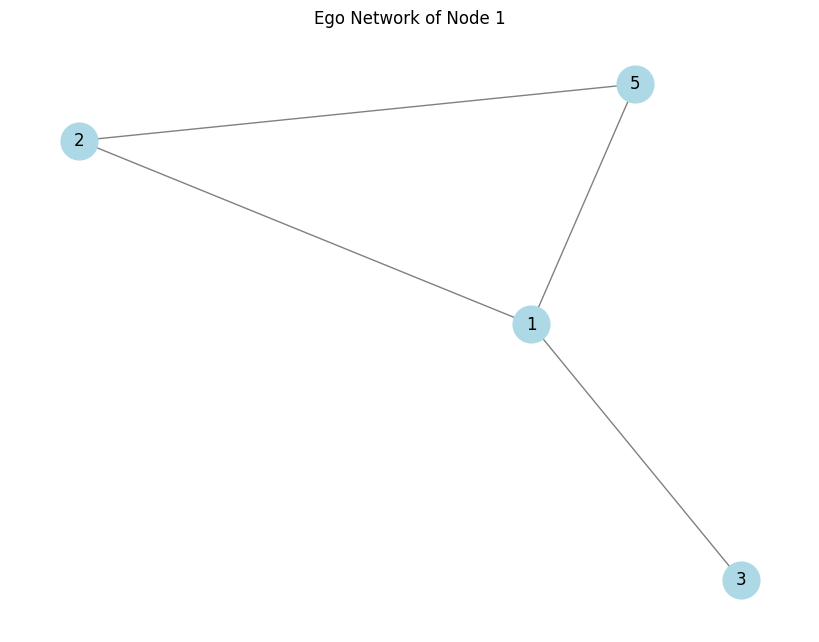

In [ ]:
# ***Practical 3: For a given network find the following: (i) Length of the shortest path from a given node to another node; (ii) the density of the graph; (iii) Draw egocentric network of node G with chosen configuration parameters.***

import networkx as nx
import matplotlib.pyplot as plt

# Create a sample graph (you can customize this)
G = nx.Graph()

# Add edges (example)
edges = [
    (1, 2), (1, 3), (2, 4), (3, 4), (4, 5),
    (2, 5), (1, 5), (3, 6), (6, 7), (5, 7)
]
G.add_edges_from(edges)

# (i) Function to find the shortest path length from a given node to another node
def shortest_path_length(graph, start_node, end_node):
    try:
        length = nx.shortest_path_length(graph, source=start_node, target=end_node)
        return length
    except nx.NetworkXNoPath:
        return float('inf')  # No path exists

# Example usage for shortest path length
start_node = 1
end_node = 7
print(f"Shortest path length from {start_node} to {end_node}: {shortest_path_length(G, start_node, end_node)}")

# (ii) Function to calculate the density of the graph
def graph_density(graph):
    return nx.density(graph)

# Example usage for graph density
print(f"Density of the graph: {graph_density(G)}")

# (iii) Draw egocentric network of a node
def draw_egocentric_network(graph, target_node):
    ego_graph = nx.ego_graph(graph, target_node)
    pos = nx.spring_layout(ego_graph)

    plt.figure(figsize=(8, 6))
    nx.draw(ego_graph, pos, with_labels=True, node_color='lightblue', node_size=700, edge_color='gray')
    plt.title(f"Ego Network of Node {target_node}")
    plt.show()

# Example usage for drawing egocentric network
draw_egocentric_network(G, start_node)


Network as an Adjacency Matrix:
[[0 1 1 0 0]
 [1 0 0 1 1]
 [1 0 0 1 0]
 [0 1 1 0 1]
 [0 1 0 1 0]]

Network as an Edge List:
[(1, 2), (1, 3), (2, 4), (2, 5), (3, 4), (4, 5)]


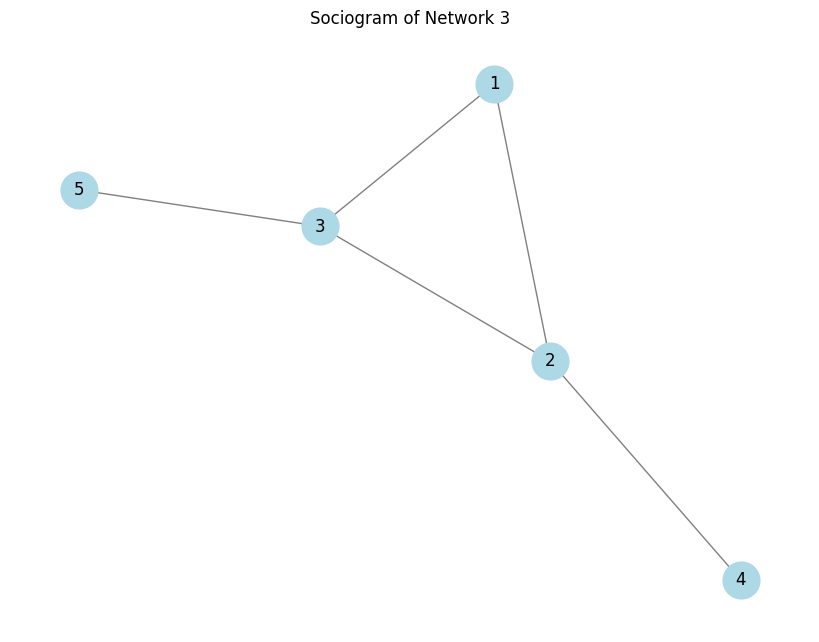


Network as a Sociogram has been visualized.


In [ ]:
# ***Practical 4: Write a program to distinguish between a network as a matrix, a network as an edge list,and a network as a sociogram (or “network graph”) using 3 distinct networks representatives of each***
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Example Network 1: Adjacency Matrix
# Create a graph using an adjacency matrix
adj_matrix = np.array([[0, 1, 1, 0, 0],
                        [1, 0, 0, 1, 1],
                        [1, 0, 0, 1, 0],
                        [0, 1, 1, 0, 1],
                        [0, 1, 0, 1, 0]])

# Use from_numpy_array instead of from_numpy_matrix
G1 = nx.from_numpy_array(adj_matrix)

# Print the adjacency matrix
print("Network as an Adjacency Matrix:")
print(adj_matrix)

# Example Network 2: Edge List
# Create a graph using an edge list
edges = [(1, 2), (1, 3), (2, 4), (2, 5), (3, 4), (4, 5)]
G2 = nx.Graph()
G2.add_edges_from(edges)

# Print the edge list
print("\nNetwork as an Edge List:")
print(edges)

# Example Network 3: Sociogram (Network Graph)
# Create a graph for the sociogram
G3 = nx.Graph()
G3.add_edges_from([(1, 2), (1, 3), (2, 3), (2, 4), (3, 5)])

# Function to draw the sociogram
def draw_sociogram(graph, title):
    plt.figure(figsize=(8, 6))
    pos = nx.spring_layout(graph)
    nx.draw(graph, pos, with_labels=True, node_color='lightblue', node_size=700, edge_color='gray')
    plt.title(title)
    plt.show()

# Draw the sociogram
draw_sociogram(G3, "Sociogram of Network 3")

# Summary
print("\nNetwork as a Sociogram has been visualized.")

In [ ]:
# ***Practical 5: Write a program to exhibit structural equivalence, automatic equivalence, and regular equivalence from a network***
import networkx as nx
import numpy as np

# Create a sample graph
edges = [(1, 2), (1, 3), (2, 4), (2, 5), (3, 4), (3, 6), (4, 5), (5, 6)]
G = nx.Graph()
G.add_edges_from(edges)

# Display the graph
print("Graph Edges:", G.edges())

# (1) Structural Equivalence
def structural_equivalence(graph):
    # Use subgraph_isomorphisms_iter to find isomorphisms
    equivalence_classes = nx.algorithms.isomorphism.GraphMatcher(graph, graph).subgraph_isomorphisms_iter()
    return list(equivalence_classes)

# (2) Automatic Equivalence
def automatic_equivalence(graph):
    # Automatically equivalent nodes have the same neighbors
    # Use subgraph_isomorphisms_iter to find isomorphisms
    automorphisms = list(nx.algorithms.isomorphism.GraphMatcher(graph, graph).subgraph_isomorphisms_iter())
    return automorphisms

# (3) Regular Equivalence
def regular_equivalence(graph):
    # Nodes are regularly equivalent if they have the same degree
    degree_dict = {node: graph.degree(node) for node in graph.nodes()}
    equivalence_classes = {}

    for node, degree in degree_dict.items():
        equivalence_classes.setdefault(degree, []).append(node)

    return list(equivalence_classes.values())

# Compute equivalences
structural_eq = structural_equivalence(G)
automatic_eq = automatic_equivalence(G)
regular_eq = regular_equivalence(G)

# Display results
print("\nStructural Equivalence Classes:")
print(structural_eq)

print("\nAutomatic Equivalence Classes:")
print(automatic_eq)

print("\nRegular Equivalence Classes:")
print(regular_eq)

Graph Edges: [(1, 2), (1, 3), (2, 4), (2, 5), (3, 4), (3, 6), (4, 5), (5, 6)]

Structural Equivalence Classes:
[{1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6}, {6: 1, 5: 2, 3: 3, 4: 4, 2: 5, 1: 6}]

Automatic Equivalence Classes:
[{1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6}, {6: 1, 5: 2, 3: 3, 4: 4, 2: 5, 1: 6}]

Regular Equivalence Classes:
[[1, 6], [2, 3, 4, 5]]


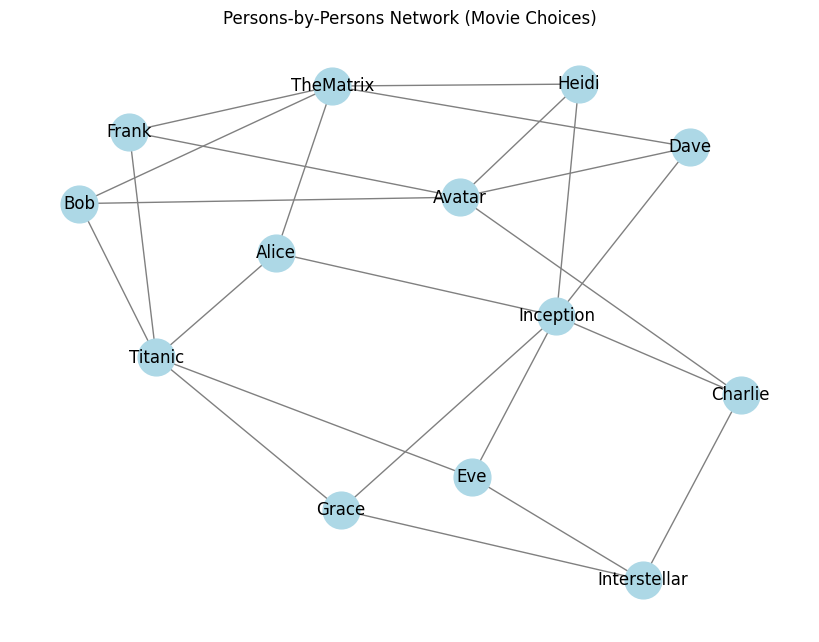

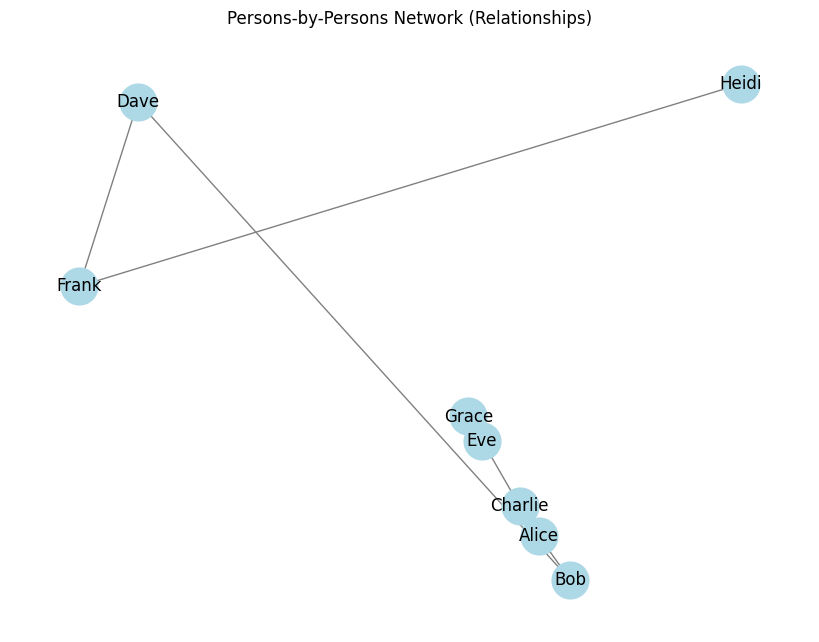

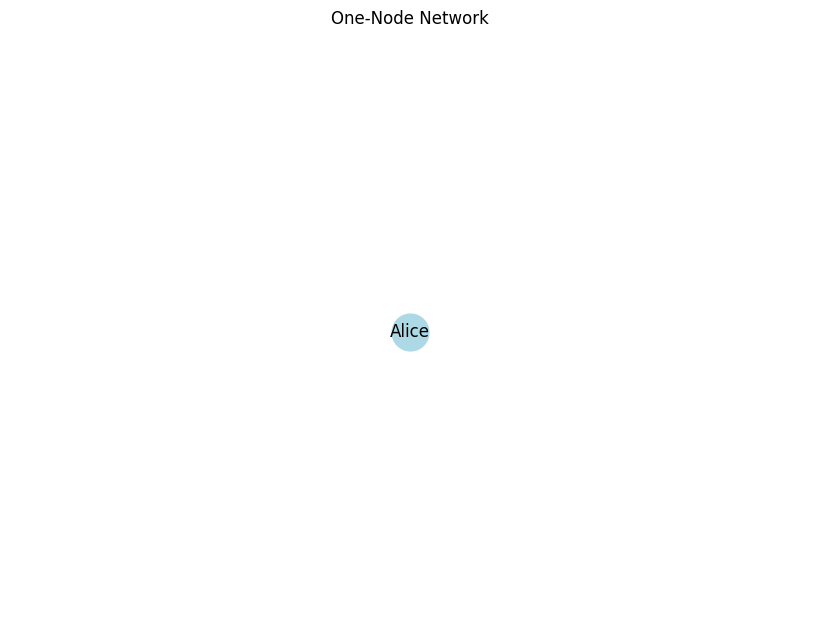

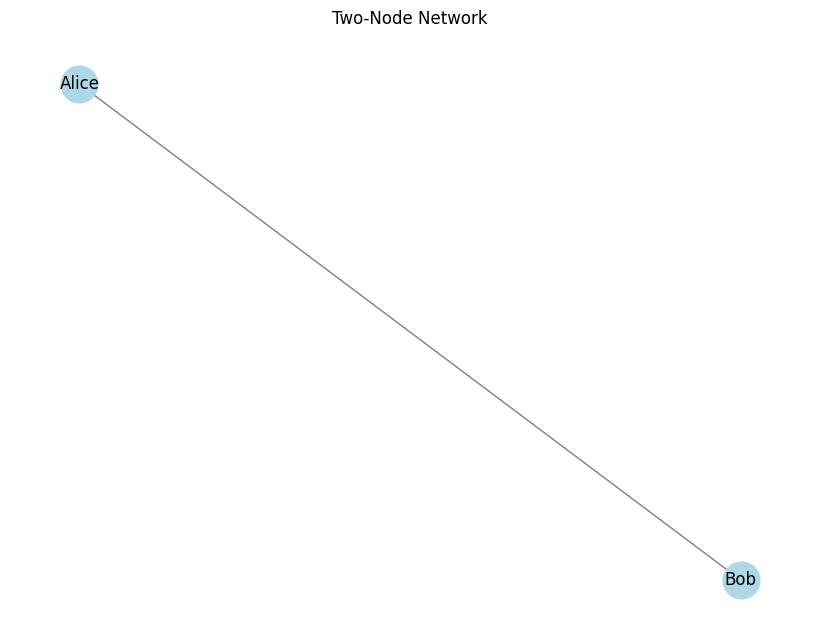

In [ ]:
# ***Practical 6: Create sociograms for the persons-by-persons network and the committee-by committee network for a given relevant problem. Create one-mode network and two-node network for the same. ***
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load movie choices into a bipartite graph
def load_movie_choices(file_path):
    df = pd.read_csv('/content/drive/MyDrive/Employee_Movie_Choices.csv', sep=',')  # Changed to ',' for CSV
    G = nx.Graph()

    # Adding employees and their movie choices to the graph
    for _, row in df.iterrows():
        employee = row['Employee']
        for movie in row[1:]:
            G.add_edge(employee, movie)

    return G

# Load relationships into a graph
def load_relationships(file_path):
    df = pd.read_csv('/content/drive/MyDrive/Employee_Relationships.csv', sep=',')  # Changed to ',' for CSV
    G = nx.Graph()

    # Adding relationships to the graph
    for _, row in df.iterrows():
        emp1 = row['Employee1']
        emp2 = row['Employee2']
        score = row['RelationshipScore']
        G.add_edge(emp1, emp2, weight=score)

    return G

# Function to draw the sociogram
def draw_sociogram(graph, title):
    plt.figure(figsize=(8, 6))
    pos = nx.spring_layout(graph)
    nx.draw(graph, pos, with_labels=True, node_color='lightblue', node_size=700, edge_color='gray')
    plt.title(title)
    plt.show()

# Load the graphs
movie_choices_graph = load_movie_choices('Employee_Movie_Choices.csv')
relationships_graph = load_relationships('Employee_Relationships.csv')

# Draw the sociograms
draw_sociogram(movie_choices_graph, "Persons-by-Persons Network (Movie Choices)")
draw_sociogram(relationships_graph, "Persons-by-Persons Network (Relationships)")

# One-node network
one_node_graph = nx.Graph()
one_node_graph.add_node("Alice")

# Two-node network
two_node_graph = nx.Graph()
two_node_graph.add_nodes_from(["Alice", "Bob"])
two_node_graph.add_edge("Alice", "Bob")

# Draw one-node and two-node networks
draw_sociogram(one_node_graph, "One-Node Network")
draw_sociogram(two_node_graph, "Two-Node Network")


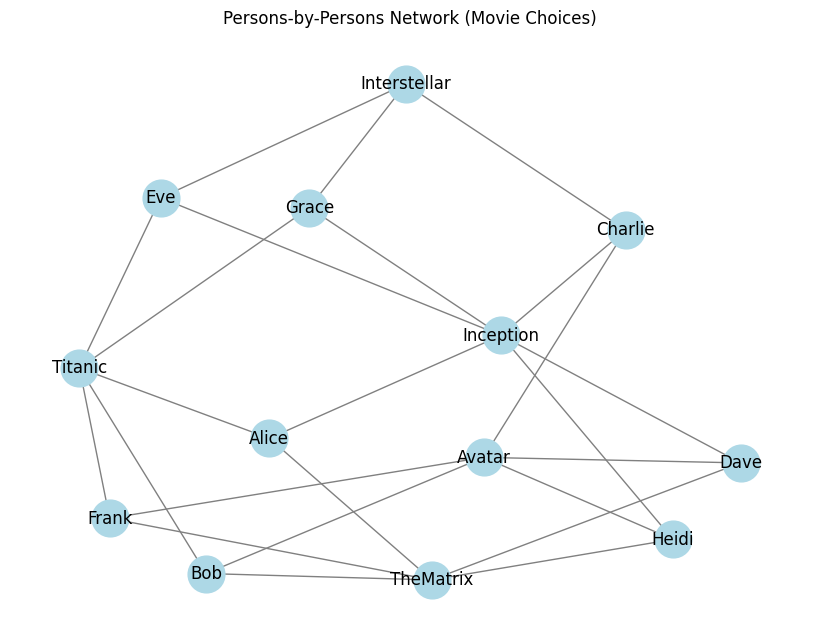

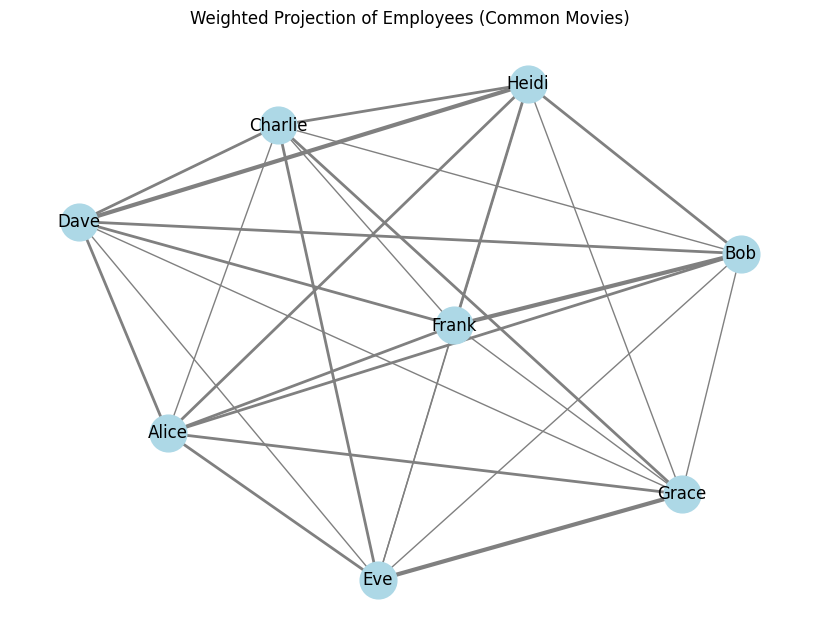

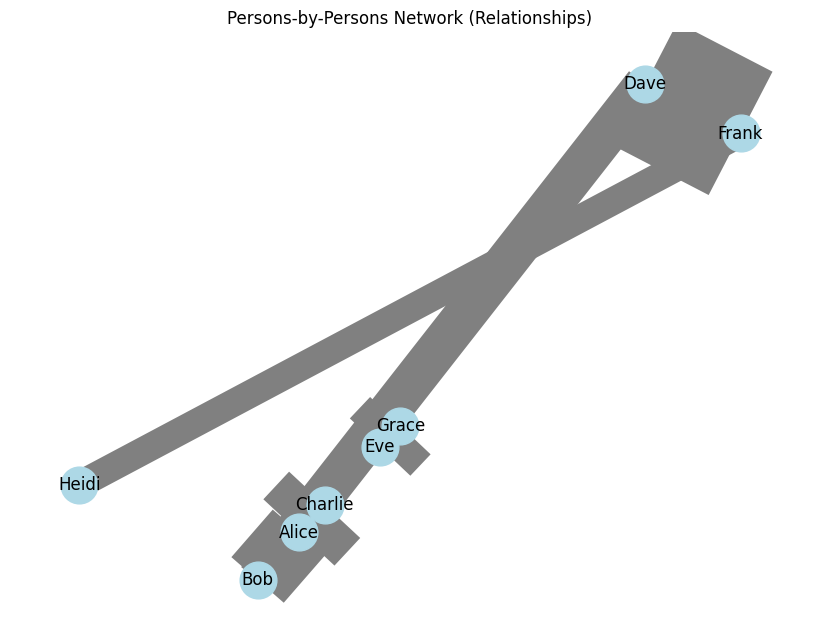

Pearson correlation between relationship scores and common movies: -0.06


In [ ]:
# ***Practical 8: Find a weighted projection of the graph from answer two which tells us how many movies different pairs of employees have in common.***
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Load movie choices into a bipartite graph
def load_movie_choices(file_path):
    df = pd.read_csv('/content/drive/MyDrive/Employee_Movie_Choices.csv', sep=',')  # Changed to ',' for CSV
    G = nx.Graph()

    # Adding employees and their movie choices to the graph
    for _, row in df.iterrows():
        employee = row['Employee']
        G.add_node(employee, type='employee') # Add employee node with type attribute
        for movie in row[1:]:
            G.add_node(movie, type='movie') # Add movie node with type attribute
            G.add_edge(employee, movie)

    return G
# Load relationships into a graph
def load_relationships(file_path):
    df = pd.read_csv('/content/drive/MyDrive/Employee_Relationships.csv', sep=',')  # Changed to ',' for CSV
    G = nx.Graph()

    # Adding relationships to the graph
    for _, row in df.iterrows():
        emp1 = row['Employee1']
        emp2 = row['Employee2']
        score = row['RelationshipScore']
        G.add_edge(emp1, emp2, weight=score)

    return G

# Project the bipartite graph onto the employee nodes
def weighted_projection(bipartite_graph):
    projected_graph = nx.Graph()

    # Get all employee nodes
    employees = [n for n in bipartite_graph.nodes if bipartite_graph.nodes[n]['type'] == 'employee']

    # Count common movies for each pair of employees
    for i in range(len(employees)):
        for j in range(i + 1, len(employees)):
            emp1 = employees[i]
            emp2 = employees[j]
            common_movies = set(bipartite_graph.neighbors(emp1)).intersection(bipartite_graph.neighbors(emp2))
            weight = len(common_movies)
            projected_graph.add_edge(emp1, emp2, weight=weight)

    return projected_graph

# Draw the sociogram
def draw_sociogram(graph, title):
    plt.figure(figsize=(8, 6))
    pos = nx.spring_layout(graph)
    # Check if the graph has weighted edges
    if all(['weight' in graph[u][v] for u, v in graph.edges()]):
        weights = [graph[u][v]['weight'] for u, v in graph.edges()]
        nx.draw(graph, pos, with_labels=True, node_color='lightblue', node_size=700, edge_color='gray', width=weights)
    else:
        # If not, draw without weights
        nx.draw(graph, pos, with_labels=True, node_color='lightblue', node_size=700, edge_color='gray')
    plt.title(title)
    plt.show()

# Calculate Pearson correlation
def calculate_pearson_correlation(rel_graph, proj_graph):
    scores = []
    common_movies = []

    for emp1, emp2 in rel_graph.edges():
        rel_score = rel_graph[emp1][emp2]['weight']
        scores.append(rel_score)

        if proj_graph.has_edge(emp1, emp2):
            common_movie_count = proj_graph[emp1][emp2]['weight']
        else:
            common_movie_count = 0  # Treat as 0 if no movies in common
        common_movies.append(common_movie_count)

    correlation, _ = pearsonr(scores, common_movies)
    return correlation

# Load the bipartite graph from movie choices
movie_choices_graph = load_movie_choices('Employee_Movie_Choices.txt')

# Draw the bipartite graph sociogram
draw_sociogram(movie_choices_graph, "Persons-by-Persons Network (Movie Choices)")

# Create the weighted projection
projected_graph = weighted_projection(movie_choices_graph)

# Draw the weighted projection sociogram
draw_sociogram(projected_graph, "Weighted Projection of Employees (Common Movies)")

# Load the relationships graph
relationships_graph = load_relationships('Employee_Relationships.txt')

# Draw the relationships sociogram
draw_sociogram(relationships_graph, "Persons-by-Persons Network (Relationships)")

# Calculate Pearson correlation between relationship scores and common movies
correlation = calculate_pearson_correlation(relationships_graph, projected_graph)
print(f"Pearson correlation between relationship scores and common movies: {correlation:.2f}")
